In [1]:
#======================DATA COLLECTION=========
#Import library
import pandas as pd
import numpy as np
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump
from joblib import load 

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 50)

#Import data
loan = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_20636\3086581823.py:25: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan_data_2007_2014.csv')


In [2]:
#=================DATA UNDERSTANDING===========
#Cek info data
loan.info()
loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Mendefinisikan model, melihat value unique dari kolom
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [4]:
#Pembuatan method untuk mempermudah
def count_plot(df, y, title, **sns_kwargs):
    value_counts = df[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    a = sns.countplot(data=df, y=y, order=value_counts.index, **sns_kwargs)
    a.set_title(title, fontdict={'fontsize': 22, 'fontweight' : 'bold'})
    plt.ylabel("")
    plt.show()
    print(percentage)

def distribution_plot(df, x, title, **sns_kwargs):
    a= sns.histplot(data=df, x=x, kde=True, **sns_kwargs)
    a.set_title(title, fontdict={'fontsize': 22, 'fontweight' : 'bold'})
    plt.ylabel("")
    plt.show()

def box_plot(df, x, y, title, **sns_kwargs):
    a=sns.boxplot(data=df, x=x, y=y, **sns_kwargs)
    a.set_title(title, fontdict={'fontsize': 22, 'fontweight' : 'bold'})
    plt.ylabel("")
    plt.show()

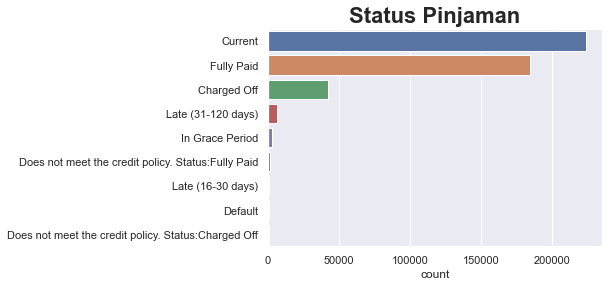

Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object


In [5]:
count_plot(loan, y="loan_status", title="Loan Status")


In [6]:
#Pemisahan Kategori
approved = ['Fully Paid']
disapproved = ['Charged Off', 'Default',
'Does not meet the credit policy. Status:Fully Paid',
'Does not meet the credit policy. Status:Charged Off']

In [7]:
#Mengganti kategori yang dipisah menjadi label baru
def loan_status_label(value):
    if value in approved:
        return 1
    else :
        return 0

#Cek apakah bekerja
print(loan_status_label('Fully Paid'))
print(loan_status_label('Default'))

1
0


In [8]:
#Penyaringan dan penerapan method
div_data = loan[loan['loan_status'].isin(approved+disapproved)].copy()
div_data['loan_status'] = div_data['loan_status'].apply(loan_status_label)

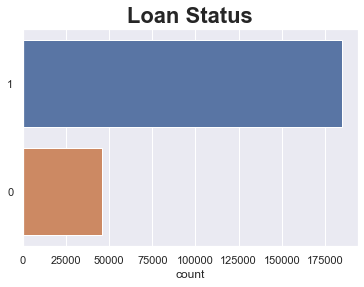

1    80.04%
0    19.96%
Name: loan_status, dtype: object


In [9]:
#Print countplot
count_plot(div_data, y='loan_status', title='Loan Status')


In [10]:
#Mencari korelasi antar kolom
correlation = (div_data.select_dtypes(exclude=object)
.corr()
.dropna(how='all',axis=0)
.dropna(how='all',axis=1))

In [11]:
correlation['loan_status'].abs().sort_values(ascending=False)

loan_status                    1.000000
total_rec_prncp                0.460338
recoveries                     0.445422
last_pymnt_amnt                0.384781
total_pymnt_inv                0.358588
total_pymnt                    0.355349
collection_recovery_fee        0.300094
int_rate                       0.241059
total_rec_late_fee             0.152231
inq_last_6mths                 0.116393
dti                            0.107257
out_prncp                      0.099816
out_prncp_inv                  0.099814
revol_util                     0.089180
tot_cur_bal                    0.076230
mths_since_last_record         0.062190
annual_inc                     0.061623
total_rev_hi_lim               0.052931
loan_amnt                      0.049253
funded_amnt                    0.048790
funded_amnt_inv                0.039854
installment                    0.033419
total_rec_int                  0.032997
total_acc                      0.030680
mths_since_last_delinq         0.029299


In [12]:
#Saring korelasi antara vmin dan vmax
vmin,vmax = 0.1, 0.99

unstack_correlation = correlation.unstack()
pos_corr = (unstack_correlation>vmin) & (unstack_correlation<vmax)
neg_corr = (unstack_correlation>-vmax) & (unstack_correlation<-vmin)
high_corr = unstack_correlation[pos_corr|neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [13]:
#Membuat mask untuk membentuk matriks segitiga
mask = np.zeros_like(trimmed_corr)
mask[np.triu_indices_from(mask)] = True

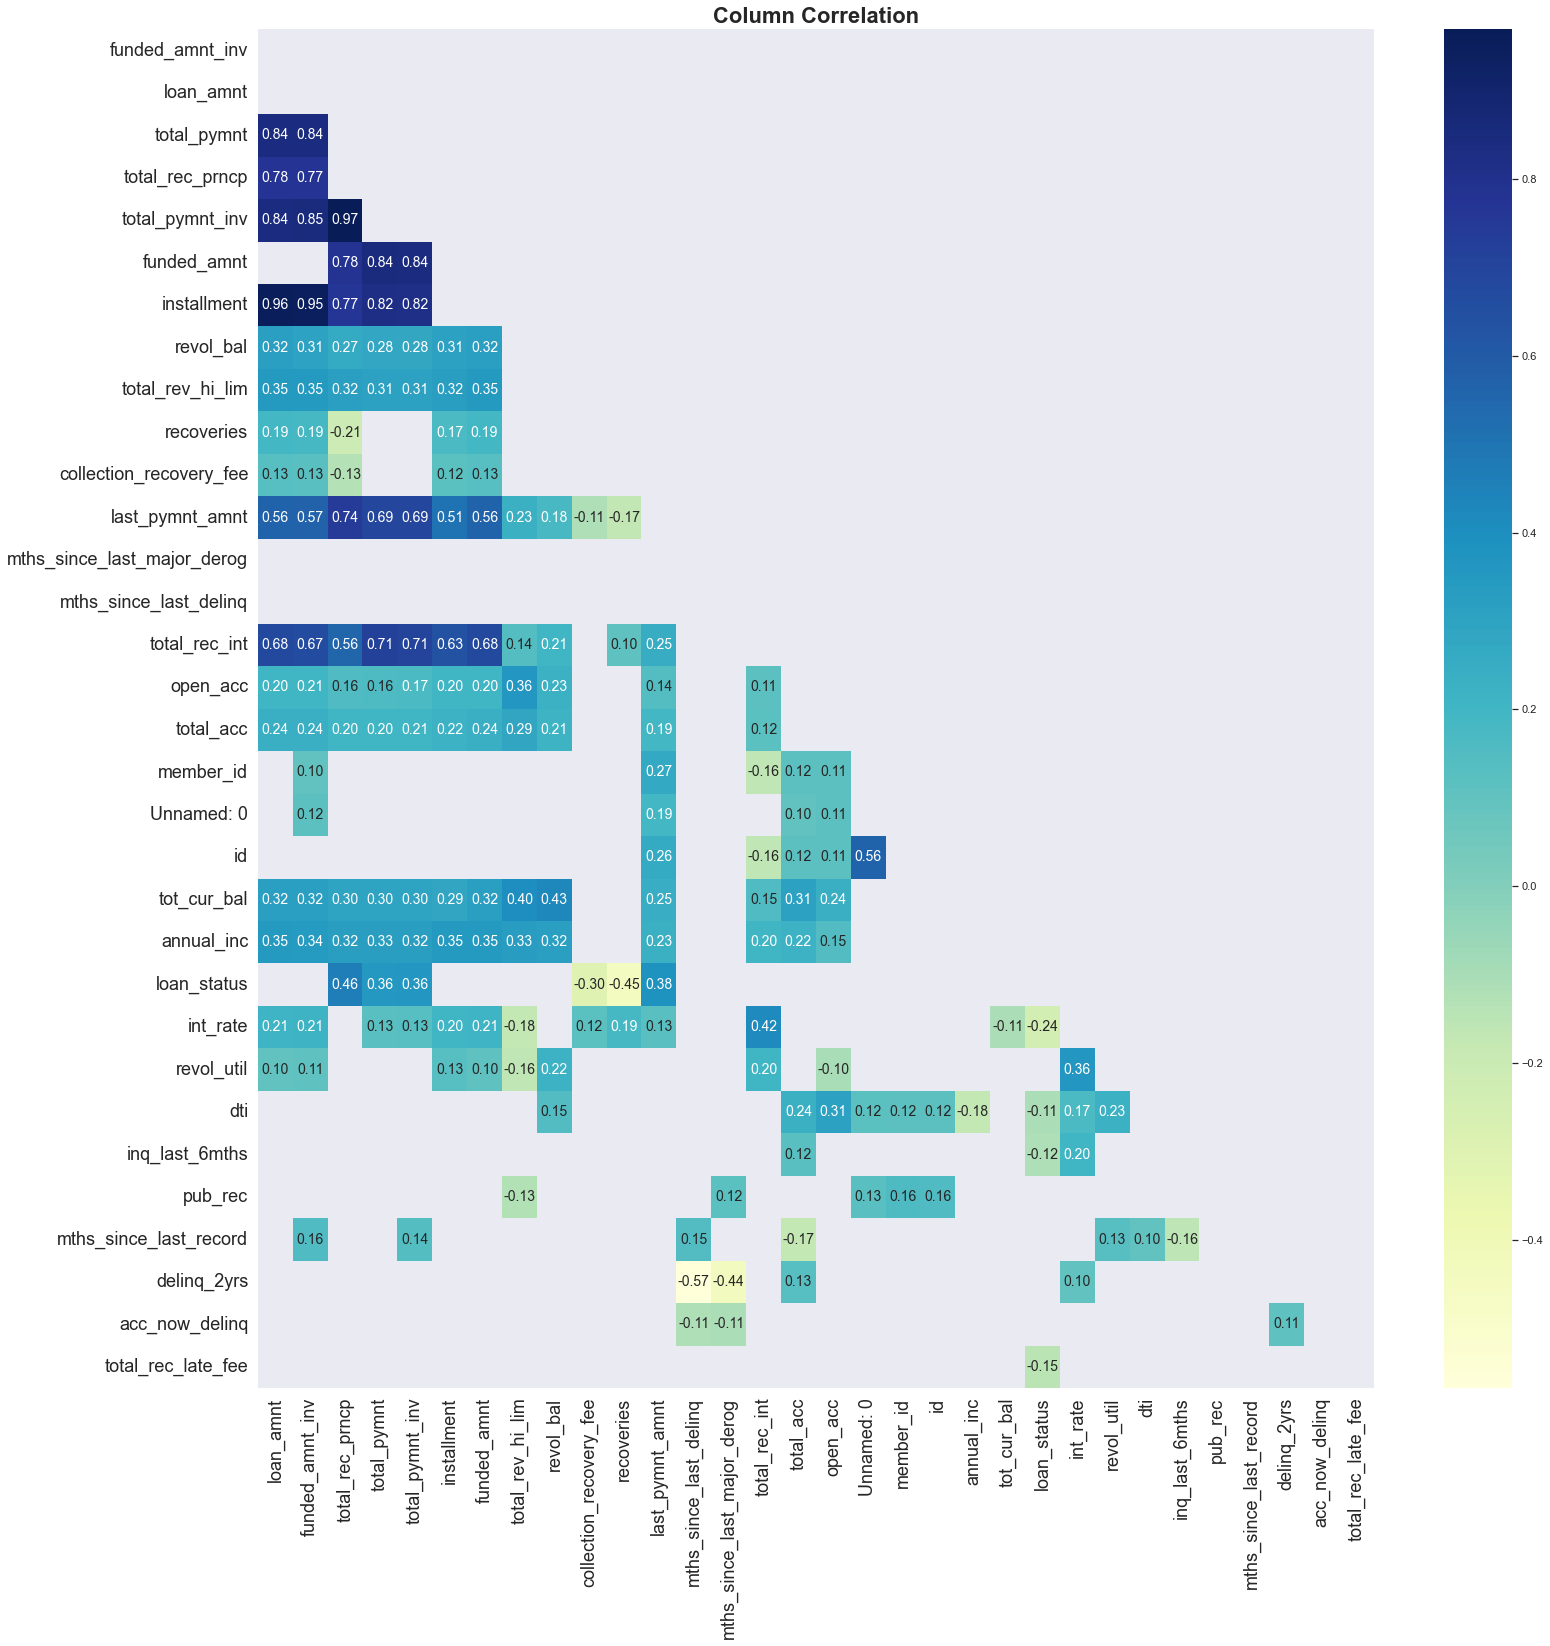

In [14]:
#Menampilkan Heatmap
plt.figure(figsize=(25,25))
heatmap = sns.heatmap(trimmed_corr, annot=True, mask=mask,
fmt = '.2f', cmap = 'YlGnBu', annot_kws={"size":14})
heatmap.set_title("Column Correlation", fontdict={'fontsize': 22, 'fontweight' : 'bold'})

heatmap.set_xticklabels(heatmap.get_xticklabels(),size=18)
heatmap.set_yticklabels(heatmap.get_yticklabels(),size=18)
plt.show()

In [15]:
#Mencari kolom yang memiliki pengaruh terhadap loan status
highcorr_loan = high_corr['loan_status'].abs().sort_values(ascending=False)
print(highcorr_loan)

total_rec_prncp            0.460338
recoveries                 0.445422
last_pymnt_amnt            0.384781
total_pymnt_inv            0.358588
total_pymnt                0.355349
collection_recovery_fee    0.300094
int_rate                   0.241059
total_rec_late_fee         0.152231
inq_last_6mths             0.116393
dti                        0.107257
dtype: float64


In [16]:
#Menggunakan nilai batas 0.9 untuk mencari yang paling berhubungan kuat
batas = 0.9
batas_bawah = (high_corr.abs().loc[high_corr>batas]
.loc[highcorr_loan.index, highcorr_loan.index]
.sort_values(ascending=False))
print(batas_bawah)

total_rec_prncp  total_pymnt        0.975030
total_pymnt      total_rec_prncp    0.975030
total_rec_prncp  total_pymnt_inv    0.969473
total_pymnt_inv  total_rec_prncp    0.969473
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_20636\4132583424.py:3: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  batas_bawah = (high_corr.abs().loc[high_corr>batas]


In [17]:
#Mencari yang paling berpengaruh diantara yang berkorelasi
left_index = batas_bawah.index.get_level_values(0)
right_index = batas_bawah.index.get_level_values(1)

def remove_collide_index(left_index, right_index):
    include, exclude = [], []

    for left, right in zip(left_index, right_index):
        if left not in include and left not in exclude:
            include.append(left)
        if right not in include and right not in exclude:
            exclude.append(right)
        
    return include, exclude


include_affect_col, exclude_affect_col = remove_collide_index(left_index, right_index)
print("selected =",include_affect_col, "\nnot selected =",exclude_affect_col)

selected = ['total_rec_prncp'] 
not selected = ['total_pymnt', 'total_pymnt_inv']


In [18]:
# Kolom numerik berpengaruh yang akan digunakan
affect_num_col = highcorr_loan[~highcorr_loan.index.isin(exclude_affect_col)].index.to_list()
affect_num_col

['total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'inq_last_6mths',
 'dti']

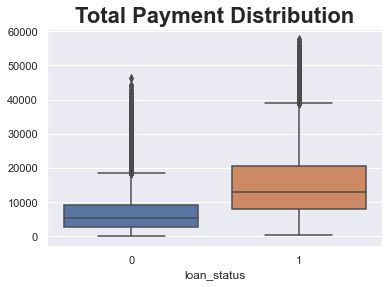

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,6814.461231,5610.294962,0.00,2829.912500,5260.94000,9120.685,46199.44000
1,184739.0,15209.872007,9459.142043,526.33,8092.460697,12979.34106,20491.905,57777.57987


In [19]:
#Status Pinjaman dan Total Pembayaran yang Diterima
box_plot(div_data, 'loan_status', 'total_pymnt', 'Total Payment Distribution')
div_data.groupby('loan_status')['total_pymnt'].describe()

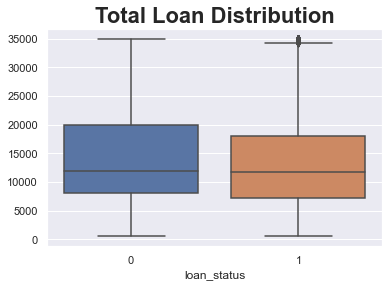

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,14205.570393,8362.468087,500.0,8000.0,12000.0,20000.0,35000.0
1,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


In [64]:
box_plot(div_data, 'loan_status','loan_amnt', 'Total Loan Distribution')
div_data.groupby('loan_status')['loan_amnt'].describe()

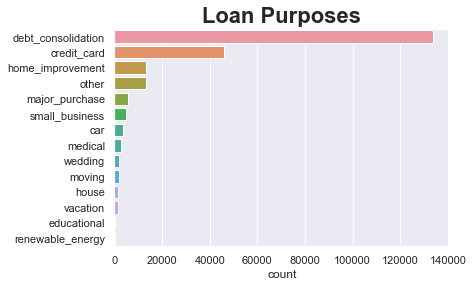

debt_consolidation    58.03%
credit_card           19.95%
home_improvement       5.83%
other                  5.76%
major_purchase         2.54%
small_business         2.02%
car                    1.50%
medical                1.15%
wedding                0.87%
moving                 0.80%
house                  0.65%
vacation               0.62%
educational            0.18%
renewable_energy       0.11%
Name: purpose, dtype: object


In [63]:
count_plot(div_data, 'purpose', 'Loan Purposes')

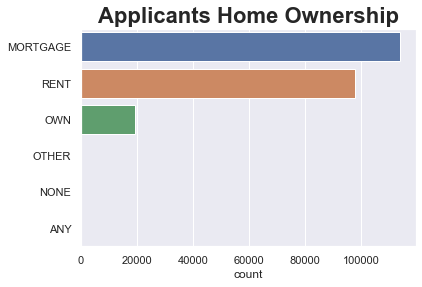

MORTGAGE    49.23%
RENT        42.29%
OWN          8.38%
OTHER        0.08%
NONE         0.02%
ANY          0.00%
Name: home_ownership, dtype: object


In [22]:
count_plot(div_data, 'home_ownership','Applicants Home Ownership')

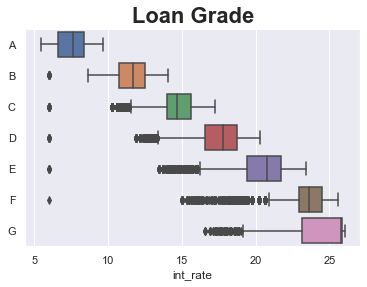

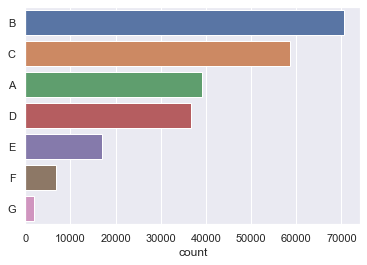

B    30.60%
C    25.40%
A    16.95%
D    15.92%
E     7.34%
F     2.99%
G     0.80%
Name: grade, dtype: object


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,39110.0,7.545742,1.003571,5.42,6.62,7.62,8.39,9.63
B,70622.0,11.654616,1.281087,6.00,10.74,11.71,12.49,14.09
C,58626.0,14.767515,1.233598,6.00,13.98,14.64,15.61,17.27
D,36740.0,17.628885,1.484771,6.00,16.59,17.77,18.75,20.31
E,16945.0,20.341001,1.920465,6.00,19.42,20.80,21.70,23.40
F,6896.0,23.137195,2.097052,6.00,22.95,23.63,24.50,25.57
G,1856.0,24.191482,2.509841,16.59,23.13,25.80,25.83,26.06


In [23]:
x,y = 'int_rate','grade'
order = div_data[y].sort_values().unique()
box_plot(div_data, x, y, 'Loan Grade',order=order)
count_plot(div_data,y,'')
div_data.groupby(y)[x].describe()

In [24]:
#======DATA PREPARATION======
#Data Cleaning
from pandas import DataFrame
from dython.nominal import associations

data_statistic = pd.DataFrame()
data_statistic.index = div_data.columns
data_statistic['unique_value'] = div_data.nunique()
data_statistic['missing_ratio'] = div_data.isna().mean()
data_statistic['dtype'] = div_data.dtypes

data_statistic

,unique_value,missing_ratio,dtype
Unnamed: 0,230795,0.000000,int64
id,230795,0.000000,int64
member_id,230795,0.000000,int64
loan_amnt,1308,0.000000,int64
funded_amnt,1311,0.000000,int64
funded_amnt_inv,9552,0.000000,float64
term,2,0.000000,object
int_rate,505,0.000000,float64
installment,43071,0.000000,float64
grade,7,0.000000,object


In [25]:
# ===== Membagi kolom ke beberapa kategori ====
# Kolom yang terlalu unik
unique_col = data_statistic[data_statistic['unique_value']==div_data.shape[0]].index.to_list()
print("Kolom yang terlalu unik")
print(unique_col)

# Kolom yang memiliki banyak kategori
cate_stat = data_statistic[data_statistic["dtype"]=='object']
many_col = cate_stat[cate_stat['unique_value']>1000].index.to_list()
print("Kolom yang memiliki banyak kategori:")
print(many_col)

# Kolom yang terdiri dari satu nilai
single_value_col = data_statistic[data_statistic['unique_value']==1].index.to_list()
print("Kolom yang terdiri dari satu nilai:")
print(single_value_col)

# Kolom yang tidak memiliki data sama sekali
missing_col = data_statistic[data_statistic['missing_ratio']==1].index.to_list()
print("Kolom yang tidak memiliki data sama sekali:")
print(missing_col)

removed_data = unique_col + many_col + single_value_col + missing_col

Kolom yang terlalu unik
['Unnamed: 0', 'id', 'member_id', 'url']
Kolom yang memiliki banyak kategori:
['emp_title', 'url', 'desc', 'title']
Kolom yang terdiri dari satu nilai:
['policy_code', 'application_type']
Kolom yang tidak memiliki data sama sekali:
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [26]:
# Menghilangkan data yang tidak terpakai
clean_df = div_data.loc[:,~div_data.columns.isin(removed_data)].copy()
clean_df.shape

(230795, 49)

In [27]:
# Mencari Kolom yang berdata kategorik
cat_features = clean_df.select_dtypes(include=object).columns
cat_features

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [28]:
# Mencari kolom yang berisi data tanggal
date_col =['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']

for col in date_col:
    print(clean_df[col].value_counts().iloc[:5])
    print()

Oct-14    8808
Jul-14    8614
Apr-14    6744
Nov-13    6665
Oct-13    6653
Name: issue_d, dtype: int64

Oct-00    1972
Oct-99    1837
Nov-00    1796
Oct-01    1779
Aug-00    1758
Name: earliest_cr_line, dtype: int64

Jul-15    11703
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9932
Name: last_pymnt_d, dtype: int64

Feb-16    795
Mar-11    107
Apr-11    101
Feb-11     91
Jan-11     79
Name: next_pymnt_d, dtype: int64

Jan-16    93758
Dec-15    13753
Nov-15     8199
Sep-15     7942
Oct-15     7805
Name: last_credit_pull_d, dtype: int64



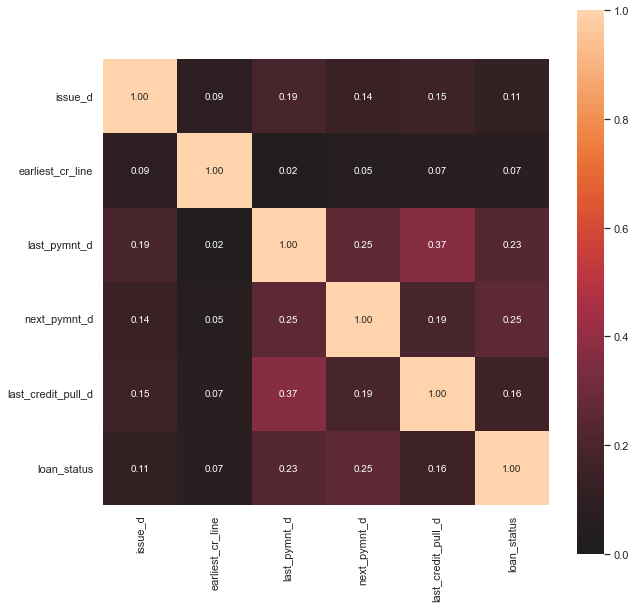

In [29]:
# Mencari korelasi antara tanggal dengan status pinjaman
date_stat = date_col +['loan_status']
complete_correlation = associations(clean_df[date_stat], filename='date_correlation.png', figsize=(10,10))

In [30]:
# Fitur tanggal yang akan digunakan
used_date_col = ['issue_d', 'last_pymnt_d','last_credit_pull_d','next_pymnt_d']
used_date_col

['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']

In [31]:
# Menghapus fitur tanggal yang tidak berkorelasi dengan loan status
unused_date_col = ['earliest_cr_line']
clean_df = clean_df.drop(columns=unused_date_col)
clean_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,1,n,credit_card,860xx,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.000,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,car,309xx,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.110,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,606xx,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.000,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,other,917xx,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.000,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,1,n,wedding,852xx,AZ,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.000,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,60 months,18.25,217.65,D,D3,5 years,MORTGAGE,37536.0,Verified,Jan-14,0,n,medical,011xx,MA,12.28,4.0,0.0,3.0,NaN,12.0,0.0,5318,10.7,26.0,f,0.0,0.0,2029.930000,2029.93,360.08,510.45,0.00,1159.40,11.594,May-14,217.65,NaN,Oct-14,0.0,4.0,0.0,0.0,116995.0,49800.0
466277,18000,18000,17975.0,36 months,7.90,563.23,A,A4,3 years,RENT,90000.0,Verified,Jan-14,0,n,debt_consolidation,212xx,MD,10.33,1.0,0.0,14.0,NaN,16.0,0.0,8224,16.3,33.0,f,0.0,0.0,5631.670000,5623.85,4580.89,1050.78,0.00,0.00,0.000,Nov-14,563.23,NaN,Oct-14,0.0,14.0,0.0,0.0,42592.0,50300.0
466278,10000,10000,10000.0,36 months,18.25,362.78,D,D3,10+ years,RENT,42000.0,Source Verified,Jan-14,1,n,vacation,201xx,VA,11.57,0.0,0.0,29.0,NaN,9.0,0.0,3196,28.8,24.0,f,0.0,0.0,12394.165200,12394.17,10000.00,2394.17,0.00,0.00,0.000,Sep-15,5501.60,NaN,Jan-16,0.0,32.0,0.0,0.0,10170.0,11100.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,D5,10+ years,MORTGAGE,78000.0,Verified,Jan-14,0,n,debt_consolidation,377xx,TN,18.45,0.0,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.0,0.0,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.000,Dec-14,17.50,NaN,Jan-16,0.0,NaN,0.0,0.0,221830.0,39400.0


In [32]:
# Mencari kolom kategori yang tidak terpakai
other_cat_features = cat_features[~cat_features.isin(date_col)]
clean_df.loc[:, other_cat_features]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,860xx,AZ,f
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,309xx,GA,f
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,606xx,IL,f
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,917xx,CA,f
5,36 months,A,A4,3 years,RENT,Source Verified,n,wedding,852xx,AZ,f
...,...,...,...,...,...,...,...,...,...,...,...
466276,60 months,D,D3,5 years,MORTGAGE,Verified,n,medical,011xx,MA,f
466277,36 months,A,A4,3 years,RENT,Verified,n,debt_consolidation,212xx,MD,f
466278,36 months,D,D3,10+ years,RENT,Source Verified,n,vacation,201xx,VA,f
466281,60 months,D,D5,10+ years,MORTGAGE,Verified,n,debt_consolidation,377xx,TN,f


In [33]:
# Menghilangkan kolom kategorikal yang tidak terpakai
unused_cols=['zip_code','sub_grade']
clean_df = clean_df.drop(columns=unused_cols)
clean_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,1,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.000,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.110,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.000,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.000,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,1,n,wedding,AZ,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.000,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,60 months,18.25,217.65,D,5 years,MORTGAGE,37536.0,Verified,Jan-14,0,n,medical,MA,12.28,4.0,0.0,3.0,NaN,12.0,0.0,5318,10.7,26.0,f,0.0,0.0,2029.930000,2029.93,360.08,510.45,0.00,1159.40,11.594,May-14,217.65,NaN,Oct-14,0.0,4.0,0.0,0.0,116995.0,49800.0
466277,18000,18000,17975.0,36 months,7.90,563.23,A,3 years,RENT,90000.0,Verified,Jan-14,0,n,debt_consolidation,MD,10.33,1.0,0.0,14.0,NaN,16.0,0.0,8224,16.3,33.0,f,0.0,0.0,5631.670000,5623.85,4580.89,1050.78,0.00,0.00,0.000,Nov-14,563.23,NaN,Oct-14,0.0,14.0,0.0,0.0,42592.0,50300.0
466278,10000,10000,10000.0,36 months,18.25,362.78,D,10+ years,RENT,42000.0,Source Verified,Jan-14,1,n,vacation,VA,11.57,0.0,0.0,29.0,NaN,9.0,0.0,3196,28.8,24.0,f,0.0,0.0,12394.165200,12394.17,10000.00,2394.17,0.00,0.00,0.000,Sep-15,5501.60,NaN,Jan-16,0.0,32.0,0.0,0.0,10170.0,11100.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,10+ years,MORTGAGE,78000.0,Verified,Jan-14,0,n,debt_consolidation,TN,18.45,0.0,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.0,0.0,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.000,Dec-14,17.50,NaN,Jan-16,0.0,NaN,0.0,0.0,221830.0,39400.0


In [34]:
# Mencari kategori lain yang berkorelasi dengan loan status
other_col = cat_features[~cat_features.isin(date_col+unused_cols+unused_date_col)]
other_col

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

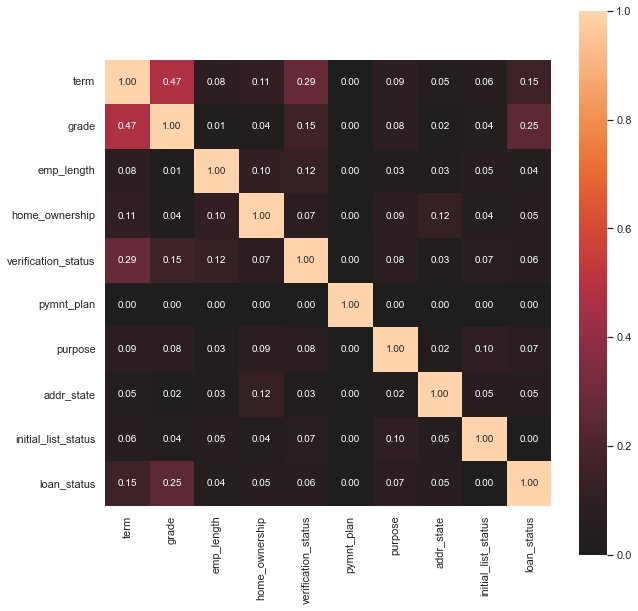

In [35]:
used_col = other_col.to_list()+['loan_status']
complete_correlation = associations(clean_df[used_col], filename='cat_correlation.png',figsize=(10,10))

In [36]:
# Kolom Kategori yang akan digunakan karena memiliki pengaruh
affect_col = ['grade','term']
affect_col

['grade', 'term']

In [37]:
# Menghapus kolom lain yang tidak memiliki pengaruh
used_col = ['emp_title','grade','term']
unused_cols = other_col[~other_col.isin(used_col)]
clean_df = clean_df.drop(columns = unused_cols)
clean_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,24000.0,Dec-11,1,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.000,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,30000.0,Dec-11,0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.110,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,12252.0,Dec-11,1,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.000,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,49200.0,Dec-11,1,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.000,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,36000.0,Dec-11,1,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.000,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,60 months,18.25,217.65,D,37536.0,Jan-14,0,12.28,4.0,0.0,3.0,NaN,12.0,0.0,5318,10.7,26.0,0.0,0.0,2029.930000,2029.93,360.08,510.45,0.00,1159.40,11.594,May-14,217.65,NaN,Oct-14,0.0,4.0,0.0,0.0,116995.0,49800.0
466277,18000,18000,17975.0,36 months,7.90,563.23,A,90000.0,Jan-14,0,10.33,1.0,0.0,14.0,NaN,16.0,0.0,8224,16.3,33.0,0.0,0.0,5631.670000,5623.85,4580.89,1050.78,0.00,0.00,0.000,Nov-14,563.23,NaN,Oct-14,0.0,14.0,0.0,0.0,42592.0,50300.0
466278,10000,10000,10000.0,36 months,18.25,362.78,D,42000.0,Jan-14,1,11.57,0.0,0.0,29.0,NaN,9.0,0.0,3196,28.8,24.0,0.0,0.0,12394.165200,12394.17,10000.00,2394.17,0.00,0.00,0.000,Sep-15,5501.60,NaN,Jan-16,0.0,32.0,0.0,0.0,10170.0,11100.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,78000.0,Jan-14,0,18.45,0.0,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,0.0,0.0,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.000,Dec-14,17.50,NaN,Jan-16,0.0,NaN,0.0,0.0,221830.0,39400.0


In [38]:
# Kolom yang berkorelasi dengan target
predictor_col = affect_num_col + used_date_col + affect_col
predictor_col

['total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'inq_last_6mths',
 'dti',
 'issue_d',
 'last_pymnt_d',
 'last_credit_pull_d',
 'next_pymnt_d',
 'grade',
 'term']

In [39]:
# Mencari kolom yang valuenya hilang
clean_df[predictor_col].isna().mean().sort_values(ascending=False)

next_pymnt_d               0.984484
last_pymnt_d               0.001629
inq_last_6mths             0.000126
last_credit_pull_d         0.000100
total_rec_prncp            0.000000
recoveries                 0.000000
last_pymnt_amnt            0.000000
collection_recovery_fee    0.000000
int_rate                   0.000000
total_rec_late_fee         0.000000
dti                        0.000000
issue_d                    0.000000
grade                      0.000000
term                       0.000000
dtype: float64

In [40]:
# Mengisi data kosong dengan "No"
clean_df['next_pymnt_d'] = clean_df['next_pymnt_d'].fillna('No')
top_next_pymnt_d = clean_df['next_pymnt_d'].value_counts().head()

clean_df['last_pymnt_d'] = clean_df['last_pymnt_d'].fillna('No')
top_last_pymnt_d = clean_df['last_pymnt_d'].value_counts().head()

clean_df['last_credit_pull_d'] = clean_df['last_credit_pull_d'].fillna('No')
top_last_credit = clean_df['last_credit_pull_d'].value_counts().head()

print(top_next_pymnt_d)
print(top_last_pymnt_d)
print(top_last_credit)

No        227214
Feb-16       795
Mar-11       107
Apr-11       101
Feb-11        91
Name: next_pymnt_d, dtype: int64
Jul-15    11703
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9932
Name: last_pymnt_d, dtype: int64
Jan-16    93758
Dec-15    13753
Nov-15     8199
Sep-15     7942
Oct-15     7805
Name: last_credit_pull_d, dtype: int64


In [41]:
# Mengisi data numerik yang kosong dengan nilai modus
modus = clean_df['inq_last_6mths'].mode().values[0]
clean_df['inq_last_6mths'] = clean_df['inq_last_6mths'].fillna(modus)
clean_df['inq_last_6mths'].head()

0    1.0
1    5.0
2    2.0
3    1.0
5    3.0
Name: inq_last_6mths, dtype: float64

In [42]:
# Cek apakah data sudah terisi semua
clean_df[predictor_col].isna().mean().sort_values()

total_rec_prncp            0.0
recoveries                 0.0
last_pymnt_amnt            0.0
collection_recovery_fee    0.0
int_rate                   0.0
total_rec_late_fee         0.0
inq_last_6mths             0.0
dti                        0.0
issue_d                    0.0
last_pymnt_d               0.0
last_credit_pull_d         0.0
next_pymnt_d               0.0
grade                      0.0
term                       0.0
dtype: float64

In [43]:
#============ MODELING DATA =============
# Memisahkan label dan fitur dari data
features = clean_df[predictor_col].copy()
label = clean_df['loan_status'].copy()

print('Label shape: ')
print(label.shape)
print('\n')
print("Features shape")
print(features.shape)

Label shape: 
(230795,)


Features shape
(230795, 14)


In [44]:
# Pre-Processing data
cat_features = features.select_dtypes(include='object')
num_features = features.select_dtypes(exclude='object')

In [45]:
# Menormalisasikan fitur numerik
num_features = (num_features - num_features.mean())/ num_features.std()
num_features

,total_rec_prncp,recoveries,last_pymnt_amnt,collection_recovery_fee,int_rate,total_rec_late_fee,inq_last_6mths,dti
0,-0.765957,-0.222400,-0.822146,-0.149837,-0.716859,-0.139146,0.078612,1.472931
1,-1.320543,-0.071386,-0.829680,-0.140651,0.340654,-0.139146,3.480063,-2.000498
2,-1.083314,-0.222400,-0.752787,-0.149837,0.498595,-0.139146,0.928975,-0.994312
3,-0.155655,-0.222400,-0.795193,-0.149837,-0.066786,2.788316,0.078612,0.475868
5,-0.765957,-0.222400,-0.823681,-0.149837,-1.346331,-0.139146,1.779338,-0.671081
...,...,...,...,...,...,...,...,...
466276,-1.332307,1.273040,-0.815471,-0.053887,1.022774,-0.139146,-0.771750,-0.530319
466277,-0.817113,-0.222400,-0.765357,-0.149837,-1.346331,-0.139146,-0.771750,-0.784472
466278,-0.155655,-0.222400,-0.049229,-0.149837,1.022774,-0.139146,-0.771750,-0.622857
466281,-1.152029,-0.222400,-0.844495,-0.149837,1.416480,-0.139146,3.480063,0.273848


In [46]:
# OneHotEncode pada fitur kategorik
cat_features = pd.get_dummies(cat_features)
cat_features

,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Apr-12,issue_d_Apr-13,issue_d_Apr-14,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Aug-12,issue_d_Aug-13,issue_d_Aug-14,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Dec-12,issue_d_Dec-13,issue_d_Dec-14,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Feb-12,issue_d_Feb-13,issue_d_Feb-14,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jan-12,issue_d_Jan-13,issue_d_Jan-14,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,issue_d_Jul-11,issue_d_Jul-12,issue_d_Jul-13,issue_d_Jul-14,issue_d_Jun-07,issue_d_Jun-08,issue_d_Jun-09,issue_d_Jun-10,issue_d_Jun-11,...,next_pymnt_d_Mar-08,next_pymnt_d_Mar-09,next_pymnt_d_Mar-10,next_pymnt_d_Mar-11,next_pymnt_d_Mar-12,next_pymnt_d_Mar-13,next_pymnt_d_Mar-14,next_pymnt_d_Mar-15,next_pymnt_d_May-08,next_pymnt_d_May-09,next_pymnt_d_May-10,next_pymnt_d_May-11,next_pymnt_d_May-12,next_pymnt_d_May-13,next_pymnt_d_May-14,next_pymnt_d_May-15,next_pymnt_d_No,next_pymnt_d_Nov-08,next_pymnt_d_Nov-09,next_pymnt_d_Nov-10,next_pymnt_d_Nov-11,next_pymnt_d_Nov-12,next_pymnt_d_Nov-13,next_pymnt_d_Nov-14,next_pymnt_d_Nov-15,next_pymnt_d_Oct-08,next_pymnt_d_Oct-09,next_pymnt_d_Oct-10,next_pymnt_d_Oct-11,next_pymnt_d_Oct-12,next_pymnt_d_Oct-13,next_pymnt_d_Oct-14,next_pymnt_d_Oct-15,next_pymnt_d_Sep-08,next_pymnt_d_Sep-09,next_pymnt_d_Sep-10,next_pymnt_d_Sep-11,next_pymnt_d_Sep-12,next_pymnt_d_Sep-13,next_pymnt_d_Sep-14,next_pymnt_d_Sep-15,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
466277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
466278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
466281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [47]:
# Menggabungkan fitur
full_features = pd.concat([num_features,cat_features],axis = 1)
full_features.shape

(230795, 411)

In [48]:
# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(full_features,label,test_size=0.2,random_state=42,stratify=label)
X_train.shape, Y_train.shape

((184636, 411), (184636,))

In [49]:
# Modeling
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', n_jobs=  -1)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [50]:
model.fit(X_train_scaled, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [52]:
filename = 'finalized_model.z'
joblib.dump(model, filename)

['finalized_model.z']

In [53]:
model = joblib.load(filename)

In [54]:
#====== Evaluasi Model====
# Memprediksi seluruh data kategori terbanyak
test_label_counts = Y_test.value_counts()
test_label_counts

1    36948
0     9211
Name: loan_status, dtype: int64

In [55]:
test_label_counts.max() / test_label_counts.sum()

0.8004506163478412

In [56]:
# Klasifikasi Train
model.score(X_train_scaled,Y_train)

0.9689876297146819

In [57]:
report = classification_report(Y_train,model.predict(X_train_scaled))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     36845
           1       0.99      0.97      0.98    147791

    accuracy                           0.97    184636
   macro avg       0.94      0.97      0.95    184636
weighted avg       0.97      0.97      0.97    184636



In [58]:
# Klasifikasi Train
model.score(X_test_scaled,Y_test)

0.9683918629086419

In [59]:
report = classification_report(Y_test, model.predict(X_test_scaled))

In [60]:
# Confusion Matrix
matrix = confusion_matrix(Y_test, model.predict(X_test_scaled))

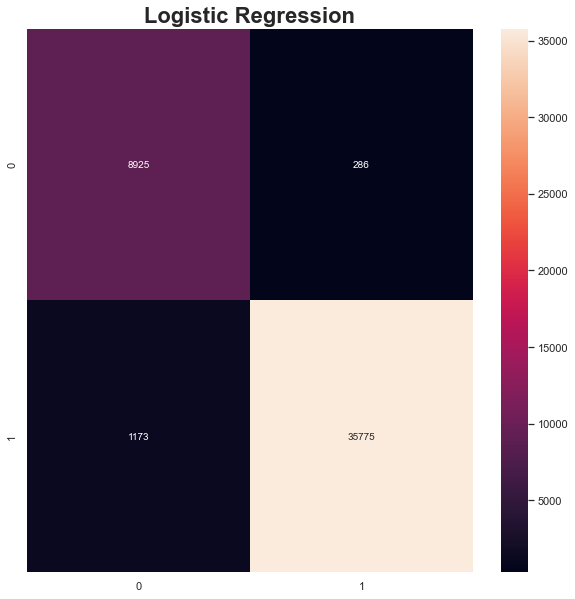

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      9211
           1       0.99      0.97      0.98     36948

    accuracy                           0.97     46159
   macro avg       0.94      0.97      0.95     46159
weighted avg       0.97      0.97      0.97     46159



In [61]:
plt.figure(figsize=(10,10))
conf_matrix = sns.heatmap(matrix, annot=True, fmt = 'g')
conf_matrix.set_title("Logistic Regression", fontdict={'fontsize': 22, 'fontweight' : 'bold'})
plt.show()
print(report)